In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# load the csv into a dataframe
house_df = pd.read_csv('week 4 - Nashville_housing_data.csv')
house_df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400.0,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800.0,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700.0,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100.0,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100.0,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000.0,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400.0,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300.0,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100.0,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [12]:
house_df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                         100
Finished Area                           45
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [13]:
#To check for bad values, we are looking at unquie value in columns

for col in house_df:
    print(col,": ", house_df[col].dtypes)
    print(house_df[col].unique())

Unnamed: 0 :  int64
[    1     2     3 ... 56607 56614 56615]
Parcel ID :  object
['105 11 0 080.00' '118 03 0 130.00' '119 01 0 479.00' ...
 '176 05 0 070.00' '176 09 0 003.00' '082 05 0 058.00']
Land Use :  object
['SINGLE FAMILY' 'DUPLEX' 'RESIDENTIAL COMBO/MISC' 'QUADPLEX']
Property Address :  object
['1802  STEWART PL' '2761  ROSEDALE PL' '224  PEACHTREE ST' ...
 '4964 HICKORY WOODS  E' '1625 5TH  AVE N' '1614 5TH  AVE N']
Suite/ Condo   # :  float64
[nan]
Property City :  object
['NASHVILLE' 'ANTIOCH' 'BRENTWOOD' 'MADISON' 'OLD HICKORY' 'HERMITAGE'
 'GOODLETTSVILLE' 'JOELTON' 'WHITES CREEK' 'MOUNT JULIET' nan]
Sale Date :  object
['1/11/2013' '1/18/2013' '1/23/2013' ... '10/18/2016' '10/27/2016'
 '10/4/2016']
Legal Reference :  object
['20130118-0006337' '20130124-0008033' '20130128-0008863' ...
 '20161031-0114817' '20161102-0115988' '20161101-0115366']
Sold As Vacant :  object
['No' 'Yes']
Multiple Parcels Involved in Sale :  object
['No' 'Yes']
City :  object
['NASHVILLE' 'ANTI

In [14]:
house_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,22651.0,27889.491192,16598.865706,1.00,13324.5,27712.00,42330.50,5.661500e+04
Suite/ Condo #,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acreage,22651.0,0.454705,0.611818,0.04,0.2,0.28,0.46,1.750000e+01
Neighborhood,22651.0,4432.715024,2142.803595,107.00,3130.0,4026.00,6229.00,9.530000e+03
Land Value,22651.0,70137.969008,102903.504144,900.00,22000.0,30000.00,60300.00,1.869000e+06
Building Value,22551.0,171651.978848,188406.212886,1400.00,85500.0,118600.00,187950.00,5.824300e+06
Finished Area,22606.0,1915.827601,1079.749749,450.00,1250.0,1645.00,2213.75,1.972825e+04
Year Built,22651.0,1961.947684,25.843908,1832.00,1947.0,1959.00,1977.00,2.017000e+03
Bedrooms,22648.0,3.104910,0.829287,0.00,3.0,3.00,4.00,1.100000e+01
Full Bath,22650.0,1.887285,0.951220,0.00,1.0,2.00,2.00,1.000000e+01


In [15]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [16]:
house_df = house_df.drop(['Suite/ Condo   #'], axis = 1)
house_df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,...,134400.0,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,...,157800.0,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,...,243700.0,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,...,138100.0,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,...,86100.0,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,ANTIOCH,10/13/2016,20161019-0110290,No,No,ANTIOCH,...,105000.0,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,10/26/2016,20161102-0115842,No,No,ANTIOCH,...,142400.0,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,10/28/2016,20161031-0114817,No,No,ANTIOCH,...,159300.0,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,10/28/2016,20161102-0115988,No,No,NASHVILLE,...,204100.0,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [17]:
house_df = house_df.drop(['Unnamed: 0'], axis = 1)
house_df

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,State,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,NASHVILLE,TN,...,134400.0,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,NASHVILLE,TN,...,157800.0,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,NASHVILLE,TN,...,243700.0,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,NASHVILLE,TN,...,138100.0,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,NASHVILLE,TN,...,86100.0,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,ANTIOCH,10/13/2016,20161019-0110290,No,No,ANTIOCH,TN,...,105000.0,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,10/26/2016,20161102-0115842,No,No,ANTIOCH,TN,...,142400.0,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,10/28/2016,20161031-0114817,No,No,ANTIOCH,TN,...,159300.0,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,10/28/2016,20161102-0115988,No,No,NASHVILLE,TN,...,204100.0,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [18]:
house_df.drop(['Parcel ID','Property Address','Legal Reference','State'], axis=1, inplace=True)

In [19]:
house_df['Sale Date'] = pd.to_datetime(house_df['Sale Date'])

In [20]:
house_df['Sale Year'] = pd.DatetimeIndex(house_df['Sale Date']).year
house_df['Sale Month'] = pd.DatetimeIndex(house_df['Sale Date']).month

In [21]:
house_df = house_df.drop(['Sale Date'], axis=1)

In [22]:
house_df['House Age'] = house_df['Sale Year'] - house_df['Year Built']
house_df

,Land Use,Property City,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,Neighborhood,Land Value,Building Value,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Sale Year,Sale Month,House Age
0,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3127,32000,134400.0,...,1941,BRICK,C,2.0,1.0,0.0,Over,2013,1,72
1,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,9126,34000,157800.0,...,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over,2013,1,13
2,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,243700.0,...,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under,2013,1,65
3,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,3130,25000,138100.0,...,1910,FRAME,C,2.0,1.0,0.0,Under,2013,1,103
4,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,3130,25000,86100.0,...,1945,FRAME,C,2.0,1.0,0.0,Under,2013,1,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,SINGLE FAMILY,ANTIOCH,No,No,ANTIOCH,0.38,URBAN SERVICES DISTRICT,6328,25000,105000.0,...,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over,2016,10,20
22647,SINGLE FAMILY,ANTIOCH,No,No,ANTIOCH,0.27,URBAN SERVICES DISTRICT,6328,25000,142400.0,...,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,20
22648,SINGLE FAMILY,ANTIOCH,No,No,ANTIOCH,0.23,URBAN SERVICES DISTRICT,6328,25000,159300.0,...,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over,2016,10,21
22649,SINGLE FAMILY,NASHVILLE,No,No,NASHVILLE,0.15,URBAN SERVICES DISTRICT,126,40000,204100.0,...,2004,FRAME,B,3.0,2.0,1.0,Over,2016,10,12


In [23]:
house_df['Grade'] = house_df['Grade'].str.strip()

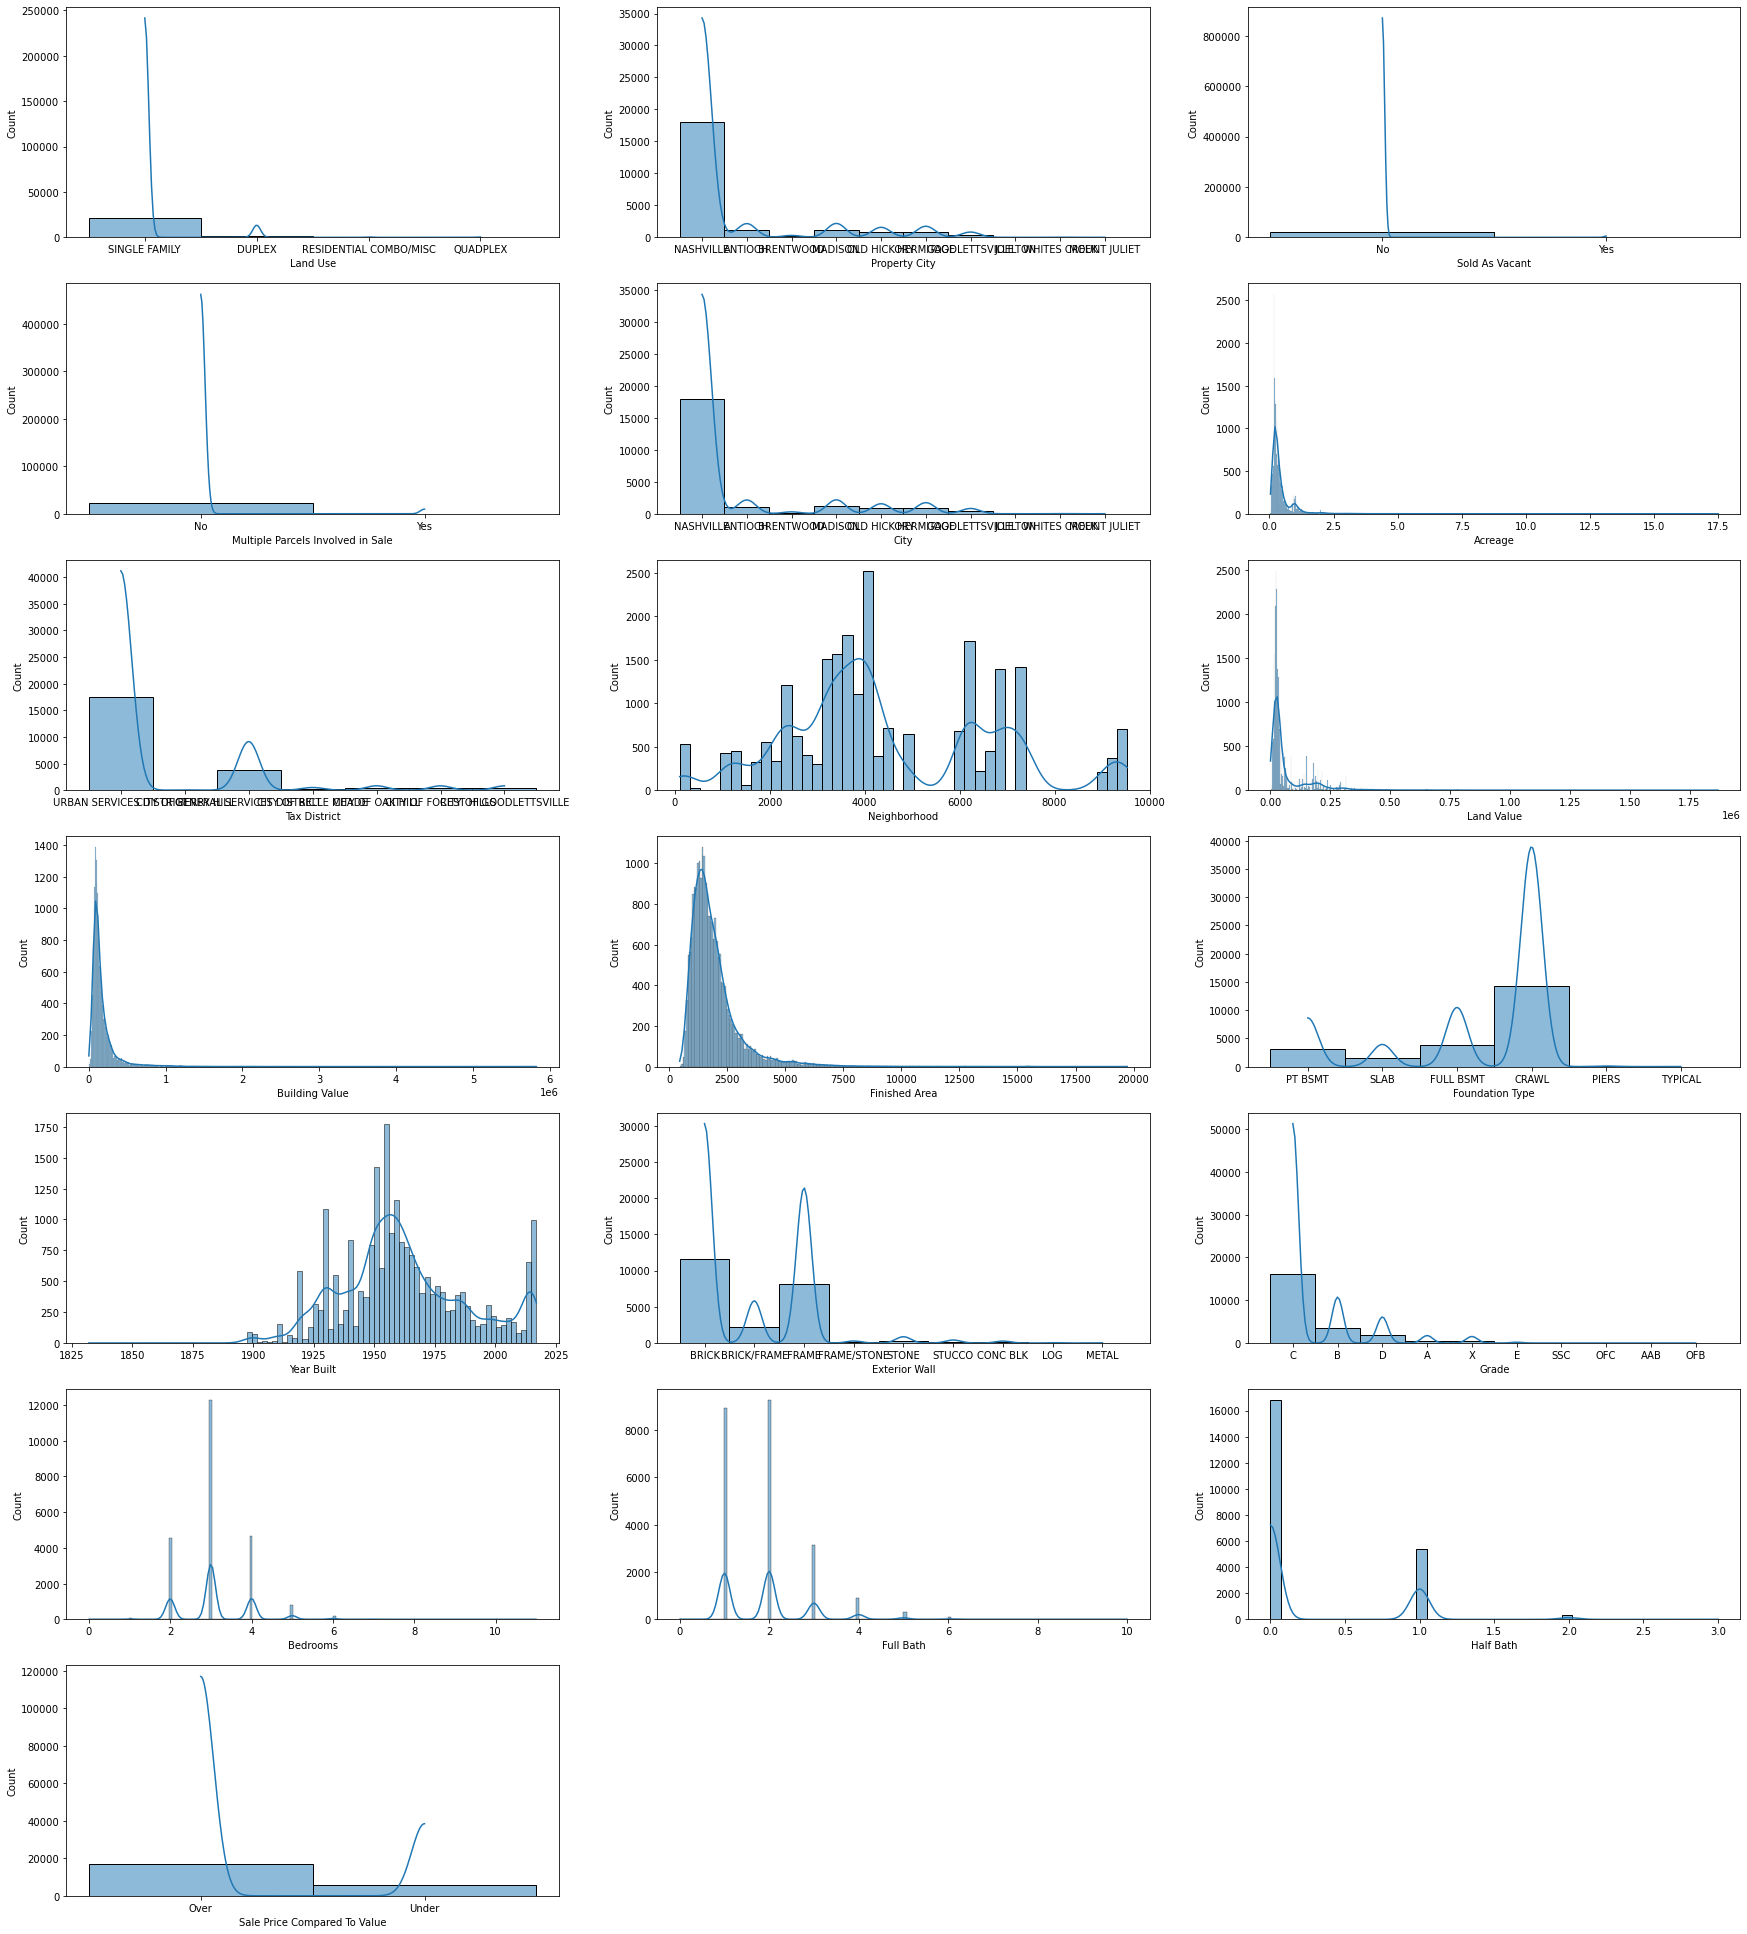

In [24]:
col_numeric = ['Land Use','Property City','Sold As Vacant','Multiple Parcels Involved in Sale','City',
                    'Acreage','Tax District','Neighborhood','Land Value','Building Value','Finished Area','Foundation Type','Year Built','Exterior Wall','Grade','Bedrooms','Full Bath','Half Bath','Sale Price Compared To Value']


fig = 0

plt.figure(figsize=(30,50))
    
for col in col_numeric: 
    fig = fig+1
    plt.subplot(10,3,fig)
    ax = sns.histplot(x = house_df[col], palette=("pink"),kde=True)
    plt.xlabel(col)

In [25]:
#house_df['Sale Price Compared To Value'].value_counts(normalize=True)

#plot the pie chart of 'Sale Price Compared To Value' categories
#house_df['Sale Price Compared To Value'].value_counts(normalize=True).plot.pie()
#plt.title("Sale Price Compared To Value", bbox={'facecolor':'0.8', 'pad':5})
#plt.show()

#fig, (axis1) = plt.subplots(1,2, figsize=(12,5))
#sns.countplot(x='Sale Price Compared To Value', data = house_df, ax = axis1)

house_df['Sale Price Compared To Value'].value_counts(normalize=True)


Over     0.752594
Under    0.247406
Name: Sale Price Compared To Value, dtype: float64

<AxesSubplot:xlabel='Sale Month', ylabel='count'>

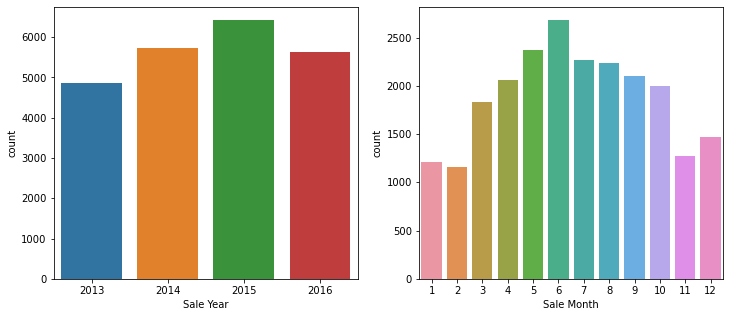

In [26]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(x='Sale Year', data = house_df, ax = axis1)
sns.countplot(x='Sale Month', data = house_df, ax = axis2)

In [27]:
house_df.isnull().sum()


Land Use                               0
Property City                          2
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
City                                   0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                       100
Finished Area                         45
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
Sale Year                              0
Sale Month                             0
House Age                              0
dtype: int64

In [28]:
house_df.drop("Property City", axis=1, inplace=True)

In [29]:
house_df['Foundation Type'] = house_df['Foundation Type'].fillna(house_df['Foundation Type'].mode()[0])

In [30]:
# replace missing values
house_df['Half Bath'] = house_df['Half Bath'].fillna(house_df['Half Bath'].median())
house_df['Full Bath'] = house_df['Full Bath'].fillna(house_df['Full Bath'].median())
house_df['Bedrooms'] = house_df['Bedrooms'].fillna(house_df['Bedrooms'].median())

house_df['Finished Area'] = house_df['Finished Area'].fillna(house_df['Finished Area'].median())
house_df['Building Value'] = house_df['Building Value'].fillna(house_df['Building Value'].median())


In [31]:
house_df["Bedrooms"].median()

3.0

In [32]:
house_df["Full Bath"].median()

2.0

In [33]:
house_df["Half Bath"].median()

0.0

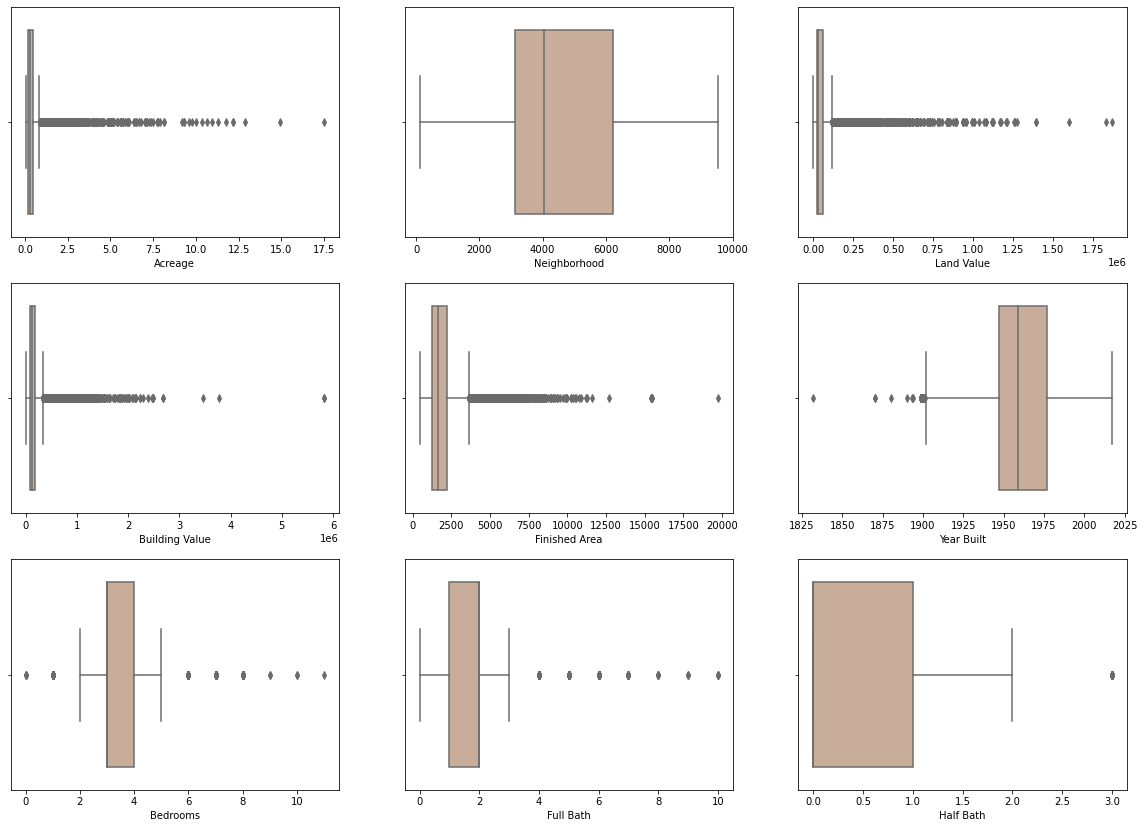

In [34]:
# Finding outliers in all the numerical columns 
col_numeric = ['Acreage','Neighborhood','Land Value','Building Value','Finished Area','Year Built','Bedrooms','Full Bath','Half Bath']




fig = 0

plt.figure(figsize=(20,50))
    
for col in col_numeric: 
    fig = fig+1
    plt.subplot(10,3,fig)
    ax = sns.boxplot(x = house_df[col], palette=("pink"))
    plt.xlabel(col)

In [35]:
house_df['Land Use'].value_counts()

SINGLE FAMILY             21390
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: Land Use, dtype: int64

In [36]:
eda = house_df.groupby('Sale Year').agg({'Land Value':'mean'}).reset_index()
eda

,Sale Year,Land Value
0,2013,78721.972912
1,2014,72585.544693
2,2015,65747.373153
3,2016,65223.821384


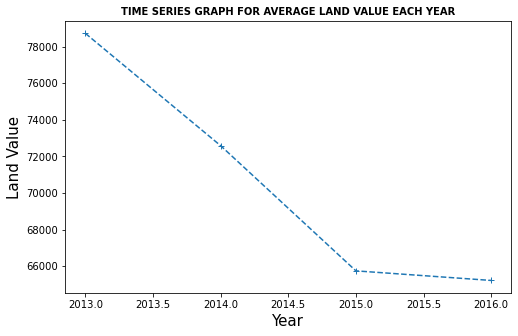

In [37]:
eda = house_df.groupby('Sale Year').agg({'Land Value':'mean'}).reset_index()
plt.figure(figsize=[8,5])
plt.plot(list(eda['Sale Year']),eda['Land Value'],"+--")
plt.title('TIME SERIES GRAPH FOR AVERAGE LAND VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Land Value',fontsize = 15)
plt.show()

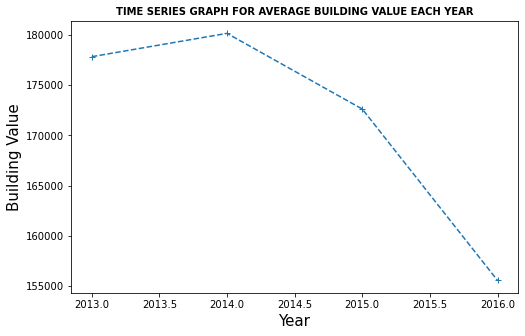

In [38]:
eda = house_df.groupby('Sale Year').agg({'Building Value':'mean'}).reset_index()
plt.figure(figsize=[8,5])
plt.plot(list(eda['Sale Year']),eda['Building Value'],'+--')
plt.title('TIME SERIES GRAPH FOR AVERAGE BUILDING VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Building Value',fontsize = 15)
plt.show()

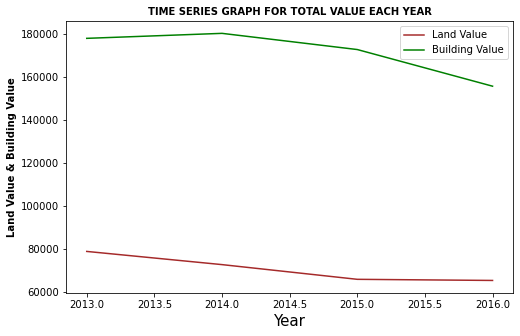

In [39]:
eda1=house_df.groupby('Sale Year').agg({'Land Value':'mean'}).reset_index()
eda2=house_df.groupby('Sale Year').agg({'Building Value':'mean'}).reset_index()

plt.figure(figsize=[8,5])
plt.plot(list(eda1['Sale Year']),eda1['Land Value'],color='brown')
plt.plot(list(eda2['Sale Year']),eda2['Building Value'],color='green')
plt.title('TIME SERIES GRAPH FOR TOTAL VALUE EACH YEAR',weight='bold',fontsize='10')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Land Value & Building Value',weight='bold',fontsize = 10)
plt.legend(['Land Value','Building Value'],loc='upper right')
plt.show()

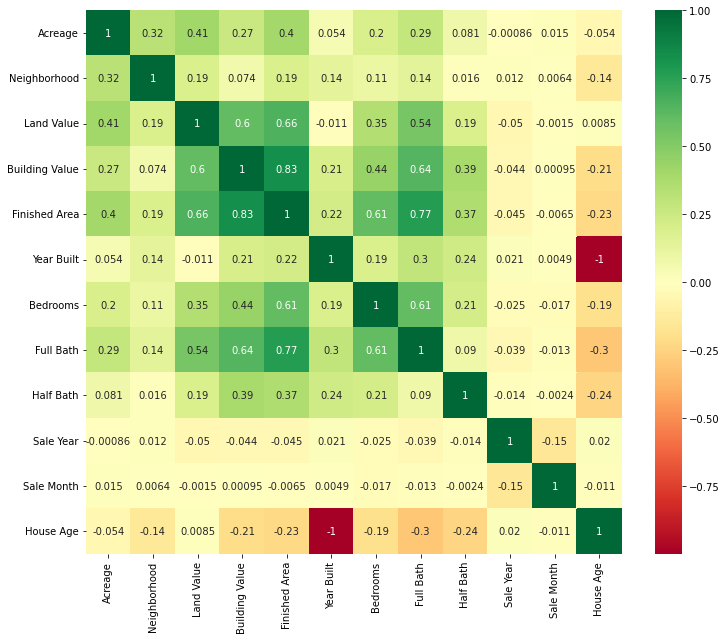

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(house_df.corr(), cmap="RdYlGn", annot=True);

In [41]:
def convert_to_binary(df, col):
    replace_this = df[col].unique()
    replace_with = np.arange(len(replace_this))
    replace(df, col, replace_this, replace_with)
    
def replace(df, col, replace_this, replace_with):
    df[col].replace(replace_this, replace_with, inplace=True)
    

def to_one_hot(df, col):
    one_hot = pd.get_dummies(df[col])
    one_hot.columns = col+"_"+one_hot.columns
    
    df.drop(col, axis=1, inplace=True)
    df = df.join(one_hot)  
    return df

In [42]:
def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

  return(vif)

In [43]:
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"p_vals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                                })

    #Reordering...
    results_df = results_df[["coeff","p_vals","conf_lower","conf_higher"]]
    return results_df

In [44]:
def confusion_mat(cm, ticks = ["False", "True"]):
    ax = sns.heatmap(cm/np.sum(cm), annot=True, 
                fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(ticks)
    ax.yaxis.set_ticklabels(ticks)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [45]:
df_num = house_df._get_numeric_data() #drop non-numeric cols

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_num.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Acreage,2.129795
1,Neighborhood,6.163377
2,Land Value,3.016327
3,Building Value,6.781705
4,Finished Area,27.052831
5,Year Built,7331.960459
6,Bedrooms,26.987612
7,Full Bath,16.505968
8,Half Bath,1.896146
9,Sale Year,7166.263591


In [47]:
df1 = house_df.drop(['Year Built','Sale Year','Finished Area', 'Bedrooms'],axis=1)
df_num = df1._get_numeric_data() #drop non-numeric cols
x=df_num.iloc[:,:-1]
calc_VIF(x)

,variables,VIF
0,Acreage,2.019568
1,Neighborhood,4.520090
2,Land Value,2.659776
3,Building Value,4.366838
4,Full Bath,7.214620
5,Half Bath,1.576335
6,Sale Month,3.700639


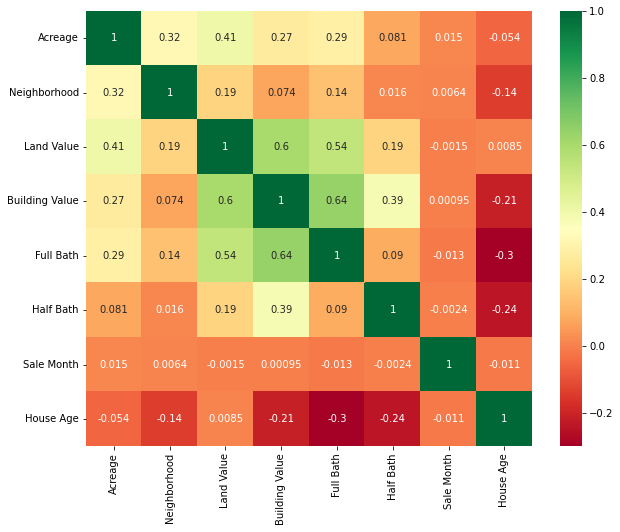

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), cmap="RdYlGn", annot=True);

In [49]:
# Converting column values to binary

convert_to_binary(df1, 'Sold As Vacant')
convert_to_binary(df1, 'Multiple Parcels Involved in Sale')
convert_to_binary(df1, 'Sale Price Compared To Value')


In [50]:
# Creating dummy variables


df1 = to_one_hot(df1, "Land Use")
df1 = to_one_hot(df1, "City")
df1 = to_one_hot(df1, "Tax District")
df1 = to_one_hot(df1, "Foundation Type")
df1 = to_one_hot(df1, "Exterior Wall")
df1 = to_one_hot(df1, "Grade")

df1

,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Neighborhood,Land Value,Building Value,Full Bath,Half Bath,Sale Price Compared To Value,Sale Month,...,Grade_A,Grade_AAB,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_OFC,Grade_SSC,Grade_X
0,0,0,0.17,3127,32000,134400.0,1.0,0.0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0.11,9126,34000,157800.0,2.0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0.17,3130,25000,243700.0,2.0,0.0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0.34,3130,25000,138100.0,1.0,0.0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0.17,3130,25000,86100.0,1.0,0.0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0,0,0.38,6328,25000,105000.0,2.0,0.0,0,10,...,0,0,0,1,0,0,0,0,0,0
22647,0,0,0.27,6328,25000,142400.0,3.0,0.0,0,10,...,0,0,0,1,0,0,0,0,0,0
22648,0,0,0.23,6328,25000,159300.0,3.0,0.0,0,10,...,0,0,0,1,0,0,0,0,0,0
22649,0,0,0.15,126,40000,204100.0,2.0,1.0,0,10,...,0,0,1,0,0,0,0,0,0,0


In [87]:
df1['Sale Price Compared To Value'].value_counts(normalize=True)


0    0.752594
1    0.247406
Name: Sale Price Compared To Value, dtype: float64

In [51]:
X = df1.drop(columns=['Sale Price Compared To Value'])
x_constant = sm.add_constant(X)
y = df1['Sale Price Compared To Value'].tolist()

In [52]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)


#plotting the p-values
plt.figure(figsize=(10,25))
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
#p_values.plot.bar()
ax = sns.barplot(x=p_values, y=p_values.index,palette = "inferno")
ax.set_title('Plotting the significant values of the Features');

ValueError: Input X must be non-negative.

In [53]:
# scaling the feature variables.
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

X_scale = preprocessing.MinMaxScaler()
X_scale.fit(X)
# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables a DataFrame.
X_scale = X_scale.fit_transform(X)

Z = pd.DataFrame(X_scale,columns=X.columns)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, \
                                                    shuffle=True, stratify=df1['Sale Price Compared To Value'])


In [55]:
x2=sm.add_constant(X_train)
est=sm.OLS(y_train,x2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     14.82
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.35e-118
Time:                        17:44:44   Log-Likelihood:                -10125.
No. Observations:               18120   AIC:                         2.035e+04
Df Residuals:                   18070   BIC:                         2.074e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [56]:
est2_f1, est2_auc = f1_score(testy, yhat), auc(est_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

NameError: name 'f1_score' is not defined

In [57]:
df_results = results_summary_to_dataframe(est2)
df_results['absolute_coeff'] = np.abs(df_results['coeff'])
df_results = df_results.sort_values(['absolute_coeff', 'p_vals'], ascending=[False, True])

df_results= df_results[df_results['p_vals'] < 0.05]
df_results

,coeff,p_vals,conf_lower,conf_higher,absolute_coeff
Building Value,0.980627,1.452233e-07,0.615246,1.346008,0.980627
Land Value,-0.824684,5.221144e-14,-1.039288,-0.610079,0.824684
Grade_OFB,-0.729385,4.907940e-02,-1.455827,-0.002942,0.729385
Sold As Vacant,0.572686,1.158209e-41,0.489883,0.655489,0.572686
Foundation Type_TYPICAL,0.386338,5.800049e-03,0.111890,0.660786,0.386338
Land Use_RESIDENTIAL COMBO/MISC,0.328132,1.506421e-06,0.194472,0.461791,0.328132
const,0.318032,1.313589e-15,0.240115,0.395948,0.318032
Acreage,0.246965,2.305472e-02,0.033971,0.459959,0.246965
Tax District_CITY OF BELLE MEADE,0.229933,3.514762e-08,0.148227,0.311638,0.229933
Grade_E,0.185794,1.204029e-03,0.073341,0.298248,0.185794


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, shuffle=True, stratify=df1['Sale Price Compared To Value'])
logreg = LogisticRegression(random_state = 42, solver='lbfgs')
logreg.fit(X_train, y_train)

/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

/Users/jargidesai/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


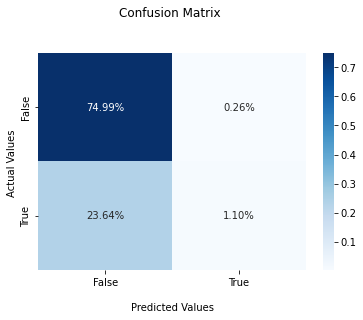

In [59]:
logreg = LogisticRegression(random_state = 2, solver='lbfgs')

logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
confusion_mat(cm)

In [60]:
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.76098


In [61]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8064516129032258
Recall: 0.04460303300624442


In [63]:
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.5205419857113334

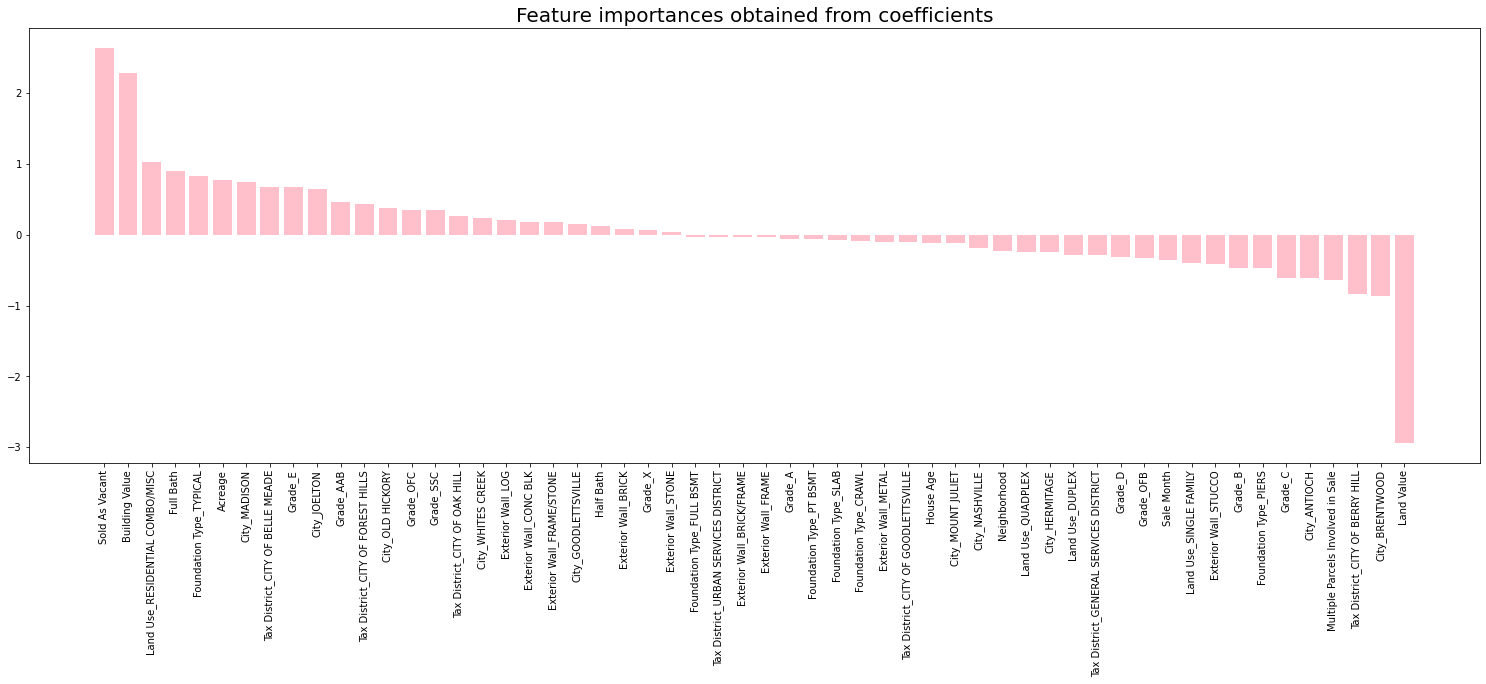

In [328]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

plt.figure(figsize=(26,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='pink')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [65]:
# Split data into 60, 20, 20
X_training_process, X_test, y_training_process, y_test = train_test_split(Z, y, test_size=0.2, random_state=42, \
                                                    shuffle=True, stratify=df1['Sale Price Compared To Value'])
X_train, X_validation, y_train, y_validation = train_test_split(X_training_process, y_training_process, test_size=0.2, random_state=42, \
                                                    shuffle=True)

In [66]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,\
                       feature_names=X.columns, \
                       class_names=['Over', "under"],
                       filled=True)

In [67]:
max_depth= [1, 2, 3, 4, 5]

In [68]:
# make dataframe with cols: depth, acccuray, precision, recall
cols = ['Depth','Validation Accuracy', 'Validation Precision', 'Validation Recall']

dt_class = pd.DataFrame(columns = cols)

for depth in max_depth:
    dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=depth, min_samples_leaf=3)   
    dt_model.fit(X_train,y_train)
    y_predD = dt_model.predict(X_validation)
    dt_class.loc[(len(dt_class))] = [depth, \
                       round(accuracy_score(y_predD, y_validation)*100,2), \
                       round(precision_score(y_predD, y_validation)*100,2), \
                       round(recall_score(y_predD, y_validation)*100,2)]
    
    
#     print('For depth: ', depth)
#     print('\t\t Validation Accuracy: '+str(round(accuracy_score(y_predD, y_validation)*100,2))+'%')
#     print('\t\t Validation Precision: '+str(round(precision_score(y_predD, y_validation)*100,2))+'%')
#     print('\t\t Validation Recall: '+str(round(recall_score(y_predD, y_validation)*100,2))+'%')
#     add rows in dataframe
    

Accuracy: 77.66%
Precision: 10.44%
Recall: 93.6%


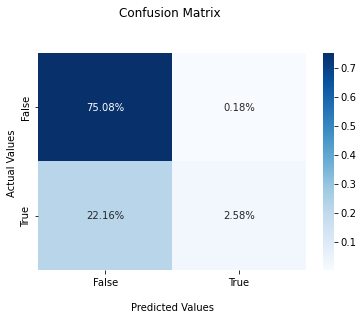

In [69]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth= 5, min_samples_leaf=3)   
dt_model.fit(X_training_process,y_training_process)

y_predD = dt_model.predict(X_test)

print('Accuracy: '+str(round(accuracy_score(y_predD, y_test)*100,2))+'%')
print('Precision: '+str(round(precision_score(y_predD, y_test)*100,2))+'%')
print('Recall: '+str(round(recall_score(y_predD, y_test)*100,2))+'%')

cm = confusion_matrix(y_test, y_predD)
confusion_mat(cm)

In [71]:
auc = metrics.roc_auc_score(y_test, y_predD)
auc

0.5510125280894468

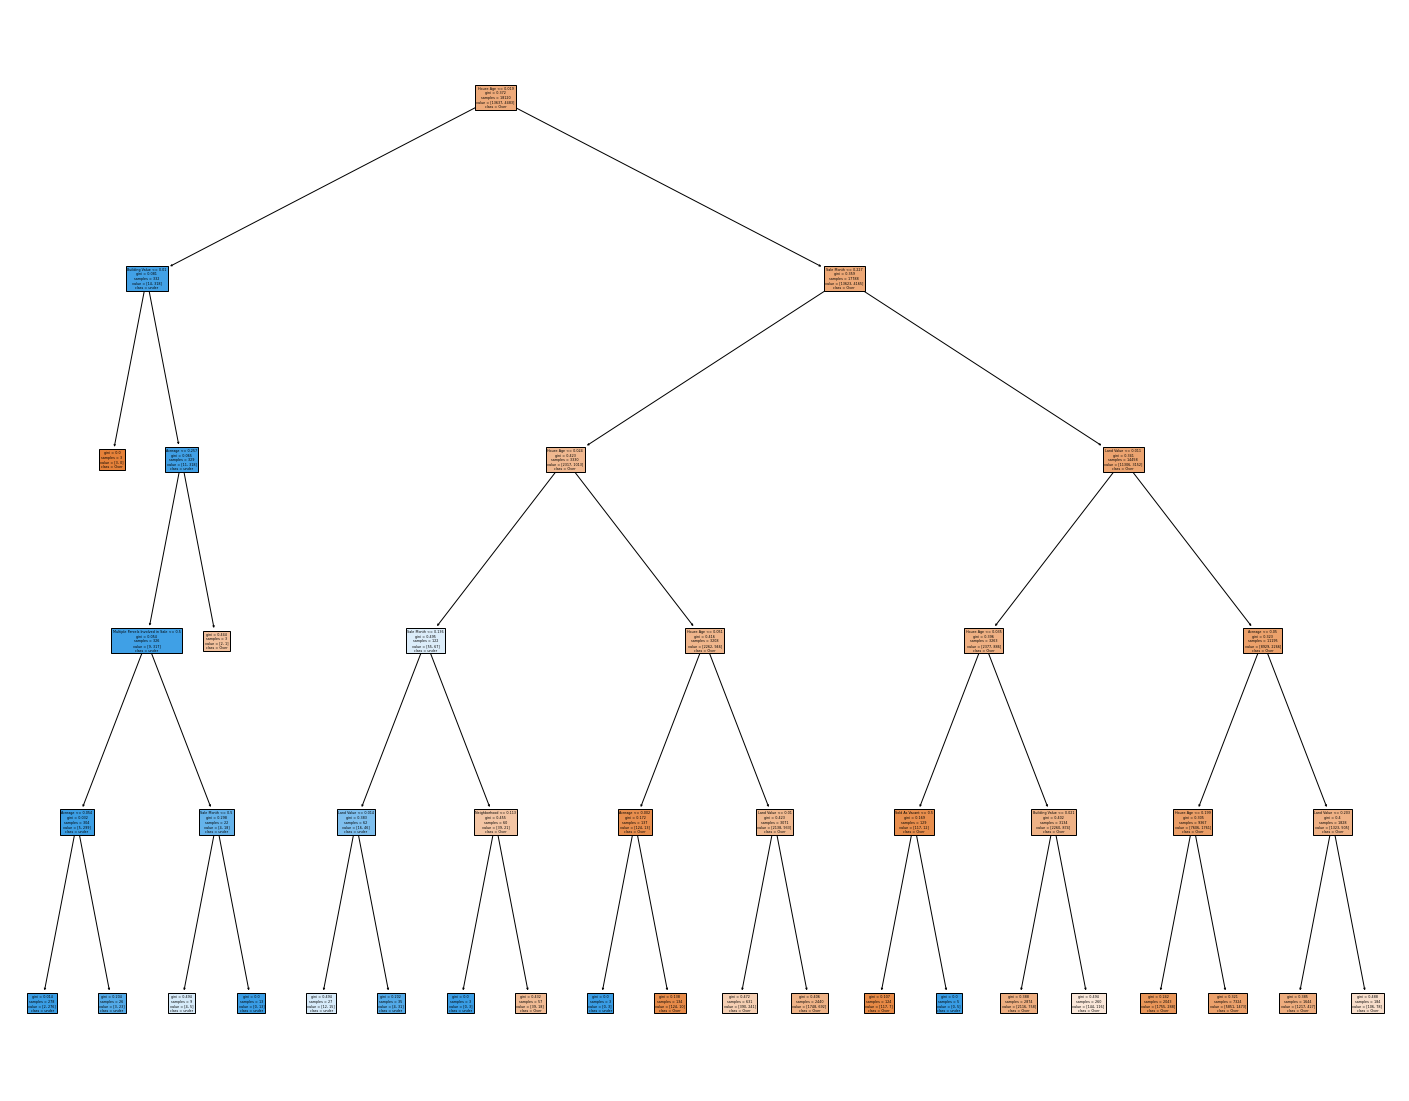

In [72]:
gph = get_dt_graph(dt_model)

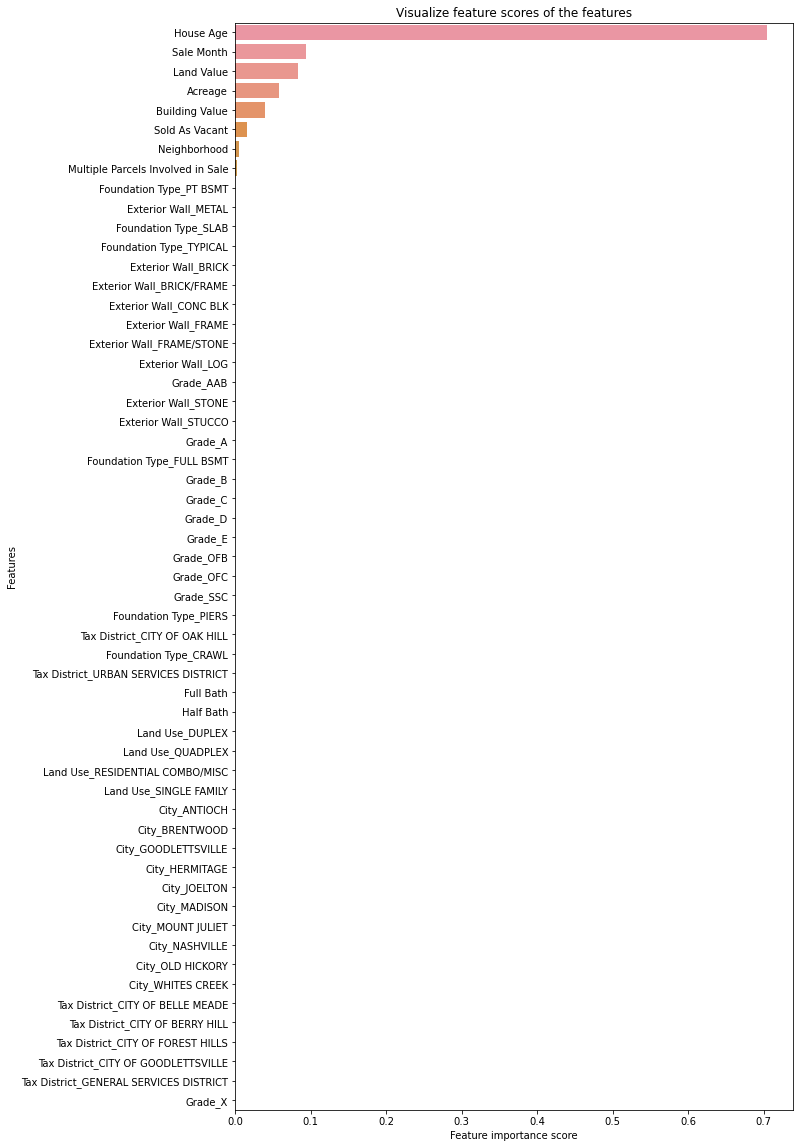

In [73]:
#Feature Importance
feature_scores = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [74]:
max_depth= [1, 2, 3, 4, 5, 7, 9, 10, 13, 15, 20, 25]

In [75]:
# make dataframe with cols: depth, acccuray, precision, recall

from sklearn.ensemble import RandomForestClassifier
cols = ['Depth','Validation Accuracy', 'Validation Precision', 'Validation Recall']

rf_class = pd.DataFrame(columns = cols)

for depth in max_depth:
    rf_model = RandomForestClassifier(random_state= 42, max_features= 'auto',\
                                  criterion="entropy",min_samples_leaf= 1, n_estimators= 100)   
    rf_model.fit(X_train,y_train)

    y_predrf = dt_model.predict(X_validation)
    rf_class.loc[(len(rf_class))] = [depth, \
                       round(accuracy_score(y_predrf, y_validation)*100,2), \
                       round(precision_score(y_predrf, y_validation)*100,2), \
                       round(recall_score(y_predrf, y_validation)*100,2)]
    
    

Accuracy of RF: 77.11%
Precision of RF: 19.09%
Recall of RF: 62.21%


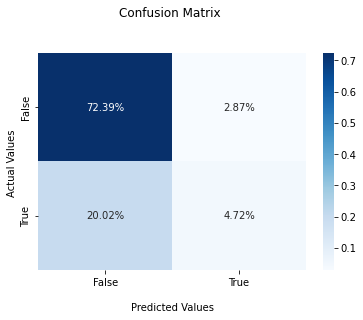

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 42, max_features= 'auto',\
                                  criterion="entropy",min_samples_leaf= 1, n_estimators= 100)   
rf_model.fit(X_train,y_train)



#Accuracy

y_predRF = rf_model.predict(X_test)
print('Accuracy of RF: '+str(round(accuracy_score(y_predRF, y_test)*100,2))+'%')
print('Precision of RF: '+str(round(precision_score(y_predRF, y_test)*100,2))+'%')
print('Recall of RF: '+str(round(recall_score(y_predRF, y_test)*100,2))+'%')

#Confusion Matrix

cm = confusion_matrix(y_test, y_predRF)
confusion_mat(cm)

In [77]:
auc = metrics.roc_auc_score(y_test, y_predRF)
auc

0.5763889070556505

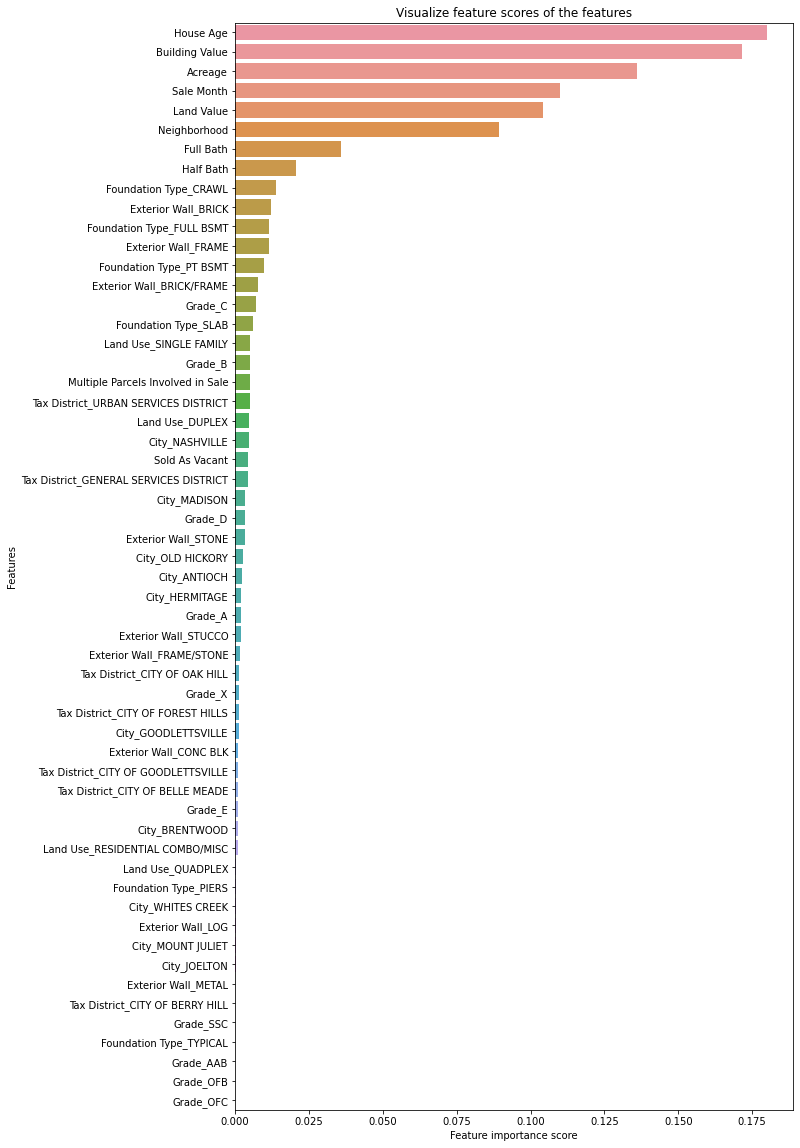

In [78]:
#Feature Importance

feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [79]:
# !conda install -c conda-forge xgboost
!pip install xgboost

You should consider upgrading via the '/Users/jargidesai/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [80]:
import xgboost as xgb

# Creating the XGBClassfier shell
clf_xgb = xgb.XGBClassifier()  

# Adding the data and fitting the model
# Instead of finding the optimal # of tress using K-Cross Validation, let's use early stopping to stop the tree when the cost function no longer reduces
# XGBoost will do the cross validation for us; we just have to specifiy the # of rounds to exhaust with no improvement before stopping
# We use evaluation metric as Area Under Precision-Recall Curve
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy of xgb: 77.53%
Precision of xgb: 9.9%
Recall of xgb: 93.28%


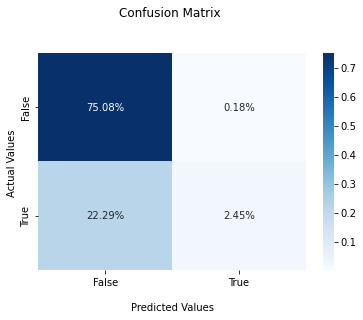

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

clf_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth= 5,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

clf_xgb.fit(X_train,y_train)

y_predgb = clf_xgb.predict(X_test)
#Accuracy

y_predRF = rf_model.predict(X_test)
print('Accuracy of xgb: '+str(round(accuracy_score(y_predgb, y_test)*100,2))+'%')
print('Precision of xgb: '+str(round(precision_score(y_predgb, y_test)*100,2))+'%')
print('Recall of xgb: '+str(round(recall_score(y_predgb, y_test)*100,2))+'%')

#Confusion Matrix

cm = confusion_matrix(y_test, y_predgb)
confusion_mat(cm)

In [83]:
auc = metrics.roc_auc_score(y_test, y_predgb)
auc

0.5483363461090721

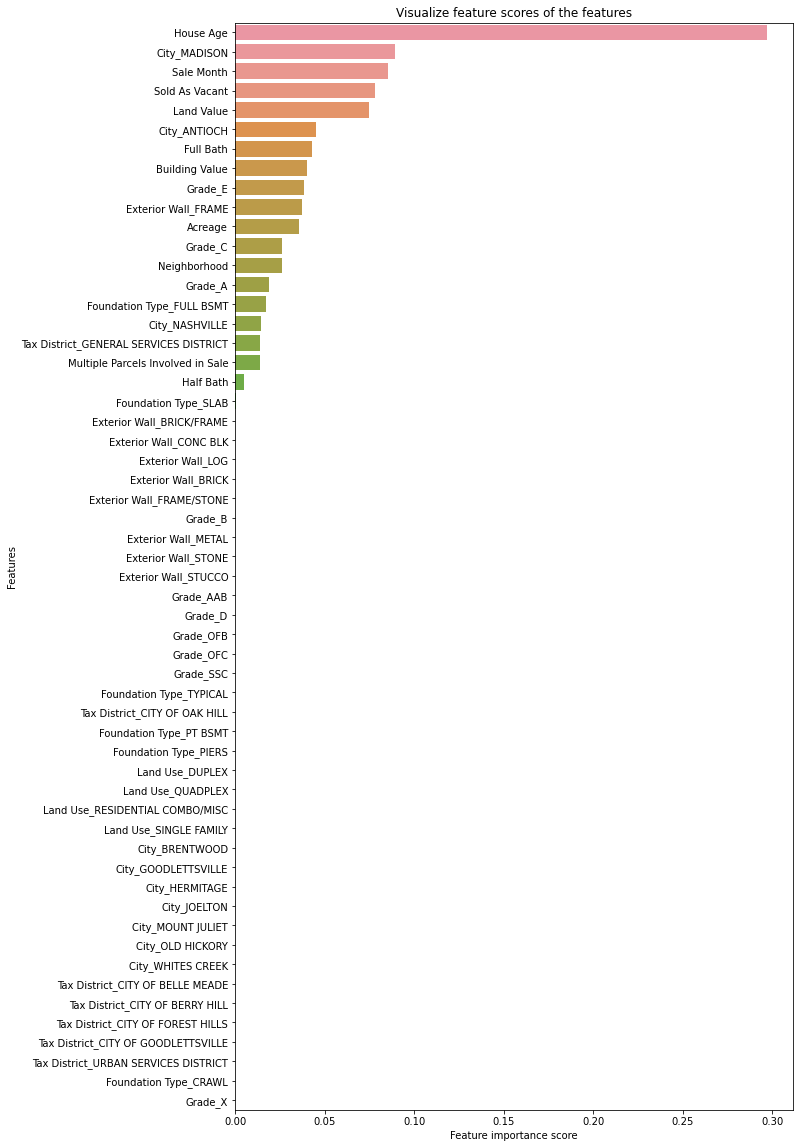

In [82]:
feature_scores = pd.Series(clf_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feature_scores)

f, ax = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [65]:
#label encoding for all categorical variables in dataset
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
house_df['Land Use'] = label_encoder.fit_transform(house_df['Land Use'])
house_df['Property Address'] = label_encoder.fit_transform(house_df['Property Address'])
house_df['Property City'] = label_encoder.fit_transform(house_df['Property City'])
house_df['Sale Date'] = label_encoder.fit_transform(house_df['Sale Date'])
house_df['Legal Reference'] = label_encoder.fit_transform(house_df['Legal Reference'])
house_df['Sold As Vacant'] = label_encoder.fit_transform(house_df['Sold As Vacant'])
house_df['Multiple Parcels Involved in Sale'] = label_encoder.fit_transform(house_df['Multiple Parcels Involved in Sale'])
house_df['City'] = label_encoder.fit_transform(house_df['City'])
house_df['State'] = label_encoder.fit_transform(house_df['State'])
house_df['Foundation Type'] = label_encoder.fit_transform(house_df['Foundation Type'])
house_df['Exterior Wall'] = label_encoder.fit_transform(house_df['Exterior Wall'])
house_df['Grade'] = label_encoder.fit_transform(house_df['Grade'])


In [68]:
#segment dataset into features set
X = house_df.loc[:, list(house_df.columns)[0:25]]

ValueError: could not convert string to float: '105 11 0 080.00'

In [67]:
#calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
 
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''